# movie genres
## Goal :
in this project, our goal is to fill-in the gaps of a detaset with the help of predicting our datasets using skit-learn library.

## Description :
in this project, first we want to fill-in the empty cells using different metods such as fill them with mean number of other existing numbers in that column and then discuss about them. then we are going to find a function in our skit-learn library, to find the best model for our dataset, wich can estimate the target column by considering one of the features in .csv file, . also, we need to analyze wich of the features in the file, is the best feature to be used as a measure, in order to predict the output, wich is the movie genres prediction.

In [2259]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.preprocessing import Normalizer,StandardScaler, OneHotEncoder
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [139]:
data = pd.read_csv("dataset.csv")
df = pd.DataFrame(data)

## Phase 0:
### Part 1 :   

In [140]:
df

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


In [141]:
df.describe()

,release_year
count,11059.000000
mean,2014.209603
std,8.959517
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB


as we can see we have 7 columns in our data set and the "type" dataset is our goal column. there is only one column that is numerical and the rest are categorical(objects). in our numerical column we can see that the mean value is 2014.2, the std is 8.95 all data are around 204 and mainly from 2013 to 2021. then we have our goal column that has 2 type of elemebt. then we have our title,description columns that include text data including words that would be tokenized in following parts for better presentation. and at last we have listed-in data and contry wich include number of categories.

### part 2:

In [143]:
print(df.isna().sum()*100/len(df))

type             0.000000
title            0.000000
cast            12.342888
country         24.369292
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64


with isna() method we return the number of lost data or Nan valuues. as we can see 12.34% of cast data frame has been lost and 24.36% of country column is lost.There are two way to solving the problem of "lost data" the first one is removing this lost data from data set and ignore them. The problem of this way is that we ignore data so it appears that is not a good idea. The second approach is to use the mean value of data.When data is missing, it may make sense to delete data, as mentioned above. However, that may not be the most effective option. For example, if too much information is discarded, it may not be possible to complete a reliable analysis. Or there may be insufficient data to generate a reliable prediction for observations that have missing data.

## Phase 1:
### part 1:

In [144]:
fdf = df.fillna(df.mode().iloc[0])
print(fdf.isna().sum()*100/len(fdf))

type            0.0
title           0.0
cast            0.0
country         0.0
release_year    0.0
listed_in       0.0
description     0.0
dtype: float64


Mean, Median and Mode
This is one of the most common methods of imputing values when dealing with missing data. In cases where there are a small number of missing observations, data scientists can calculate the mean or median of the existing observations. However, when there are many missing variables, mean or median results can result in a loss of variation in the data. This method does not use time-series characteristics or depend on the relationship between the variables.In this way all data will affect to the result so it is the better way. In my algorithm I used the second approach.the reason is that we dont want to lose our dataset values.(the columns that has lost values are categorical, in this case we use mode of or data, instead of mean.)

### part 2:
"normalization" typically means that the range of values are "normalized to be from 0.0 to 1.0". "Standardization" typically means that the range of values are "standardized" to measure how many standard deviations the value is from its mean. However, not everyone would agree with that. It's best to explain your definitions before you use them. Normalization rescales the values into a range of [0,1]. This might be useful in some cases where all parameters need to have the same positive scale. However, the outliers from the data set are lost.
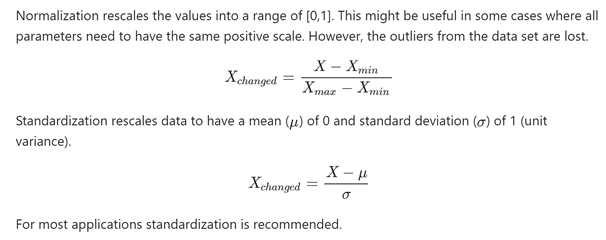Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

we want to check wich feature hase the most gain with the goal column. in this case we may **standardization** our data so that if one feature was in a higher scale range number than others, it would not cause the gain to be the most value.
(there is only one column that has numerical values, in this case the only feature that has to be standarized is release_year feature.the rest would be 0 ro 1, by one hot encoding method.)

In [2266]:
X = np.array(fdf['release_year']).reshape(-1,1)
preprossed = pd.DataFrame(Normalizer().fit_transform(X),columns=['release_year'])
print(preprossed)

       release_year
0               1.0
1               1.0
2               1.0
3               1.0
4               1.0
...             ...
11054           1.0
11055           1.0
11056           1.0
11057           1.0
11058           1.0

[11059 rows x 1 columns]


as we can see most of our data is 1.0.the reason for this is that the release_year daa are close to each other and have a low std.if we use this method it would not be so usefull for predicting our goal column. but also using standrization would also be useless because our data are all so close to the mean data. so in this part it doesnt really make any difference using any of this method for normalizing our numerucal data set.

### part 3:

In [2267]:
categorical = fdf['type'].replace(to_replace={'Movie' : 0 ,'TV Show' : 1})
preprossed = preprossed.join(pd.DataFrame(categorical))
print(preprossed)

       release_year  type
0               1.0     0
1               1.0     1
2               1.0     1
3               1.0     1
4               1.0     1
...             ...   ...
11054           1.0     1
11055           1.0     1
11056           1.0     1
11057           1.0     1
11058           1.0     1

[11059 rows x 2 columns]


there are two methods for dealing with categorical datasets. first one is label encoding. One of the simplest and most common solutions advertised to transform categorical variables is Label Encoding. It consists of substituting each group with a corresponding number and keeping such numbering consistent throughout the feature.This solution makes the models run, and it is one of the most commonly used by aspiring Data Scientists. However, its simplicity comes with many issues.Numbers hold relationships. For instance, four is twice two, and, when converting categories into numbers directly, these relationships are created despite not existing between the original categories.for avoiding this type of mistakes, we can use one hot encoding.Numbers hold relationships. For instance, four is twice two, and, when converting categories into numbers directly, these relationships are created despite not existing between the original categories.in this project. our goal column only consist of 2 value. so in here it doesnt have any difference between our two methods. and because label encoding is easier than one hot encoding (because in one hot encoding our goal would consists of two columns) we used label encoding for this part.


### part 4:

In [2268]:
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\b[a-zA-Z]{4,}\b',ngram_range=(1, 1),stop_words=['with',])
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
texts_data = fdf.drop(columns = ["type", "release_year"])

for feature in texts_data:
    texts_data[feature]
    listed = vectorizer.fit_transform(texts_data[feature])
    vectorized = tfidf_transformer.fit_transform(listed)
    tfidfed = pd.DataFrame(vectorized.toarray(),columns=vectorizer.get_feature_names())
    top5 = sorted(tfidfed.sum(),reverse=True)[:5]
    for i in range(5):
        preprossed = preprossed.join(pd.DataFrame(tfidfed[tfidfed.sum()[tfidfed.sum() == top5[i]].index]))
        
        
preprossed

,release_year,type,love,life,world,series,time,attenborough,david,michael,...,movies,dramas,international,shows,comedies,their,when,from,this,that
0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.748184,0.663491,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,1.0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.321103,0.282625,0.383961,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,1.0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.235774,0.640623,0.000000,0.0,0.0,0.110595,0.000000,0.000000
3,1.0,1,0.0,0.0,0.0,0.0,0.0,0.748184,0.663491,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.096781,0.000000
4,1.0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.276309,0.750762,0.362457,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,1.0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.116173,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.164069
11055,1.0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
11056,1.0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
11057,1.0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


in this part we have implemented the count vectrized part for our data frame wich includes text information. also for part 3 that includes listed data, we also used this method. for each column in this part, we considered 5 top most repeated word in each column and we return them and calculated the wight of each word in each data in our data frame. for calculating such value, we used count vetorized function wich would split all text data in to words and it would put them in alphabet order and also it would remove numerical or other characters also we would not regard words wich consists of less than 4 letter. also we removes the 'with' word in our stopword. as we know stop words are those words wich ae repaeted frequently but are not related to our data clusters and they exist in any class. and considering them as the most reapeted word would nothelp the program to undrestand wich feature is better for our prediction. for solving this problem we used another method call tfidf_transformer. this method would not consider stop words o those words that reapet the most as an important feature and would give a less weight to them. after creating this transformers we would find 5 top most reapeted words in each column and add them to our dataframe. is we consider more features and words, the value of relatable featured and their information gain would decrease and wouldnt be usefull, and it would just make our model slower.

### part 5:

Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute (Source). In the case of a continuous-valued attribute, split points for branches also need to define. Most popular selection measures are Information Gain, Gain Ratio, and Gini Index.
We want to determine which attribute in a given set of training feature vectors is most useful for discriminating between the classes to be learned.

• Information gain tells us how important a given attribute of the feature vectors is.

• We will use it to decide the ordering of attributes in the nodes of a decision tree.

**Information Gain:**

 Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.
 
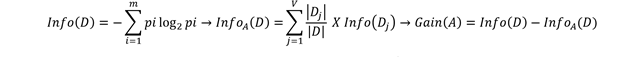
Where,

Info(D) is the average amount of information needed to identify the class label of a tuple in D.
|Dj|/|D| acts as the weight of the jth partition.
InfoA(D) is the expected informa-tion required to classify a tuple from D based on the partitioning by A.
The attribute A with the highest information gain, Gain(A), is chosen as the splitting attribute at node N().

In [2270]:
Features = preprossed.drop(columns = ['type'])
Y = preprossed.drop(columns = Features)
gains = mutual_info_classif(Features,Y.values.ravel())

In [2271]:
headers = list(preprossed.columns)
infgain = pd.DataFrame(Features.columns,columns=["features"])
infgain = infgain.join(pd.DataFrame(gains,columns=["gains"]))
infgain

,features,gains
0,release_year,0.003005
1,love,0.002038
2,life,0.001798
3,world,0.000000
4,series,0.003348
5,time,0.001027
6,attenborough,0.014913
7,david,0.009092
8,michael,0.004945
9,john,0.000000


now between all features we need to find the best feature that has the most related feature to our goal column. for calculating wich word has repeated the most, we have to do a sumation over all values in a column. and each column that has the most value is the most reapeted word. for doing so, we need to use the mutal_info_classif(). this function would use the equation above to calculate ithe information gain of each feature.we calculated gain for each feature and we plot the gain for each feature as it can be seen in the plot, the word "movie" and its probability to be shown in a data is more than any of other features. so we esstimate our goal feature based on this.In most situations, more data is usually better. Overfitting is essentially learning spurious correlations that occur in your training data, but not the real world. For example, if you considered only my colleagues, you might learn to associate "named Matt" with "has a beard." It's 100% valid (n=4, even!) when considering only the small group of people working on floor, but it's obviously not true in general. Increasing the size of your data set (e.g., to the entire building or city) should reduce these spurious correlations and improve the performance of your learner.
That said, one situation where more data does not help---and may even hurt---is if your additional training data is noisy or doesn't match whatever you are trying to predict. I once did an experiment where I plugged different language models[*] into a voice-activated restaurant reservation system. I varied the amount of training data as well as its relevance: at one extreme, I had a small, carefully curated collection of people booking tables, a perfect match for my application. At the other, I had a model estimated from huge collection of classic literature, a more accurate language model, but a much worse match to the application. To my surprise, the small-but-relevant model vastly outperformed the big-but-less-relevant model.

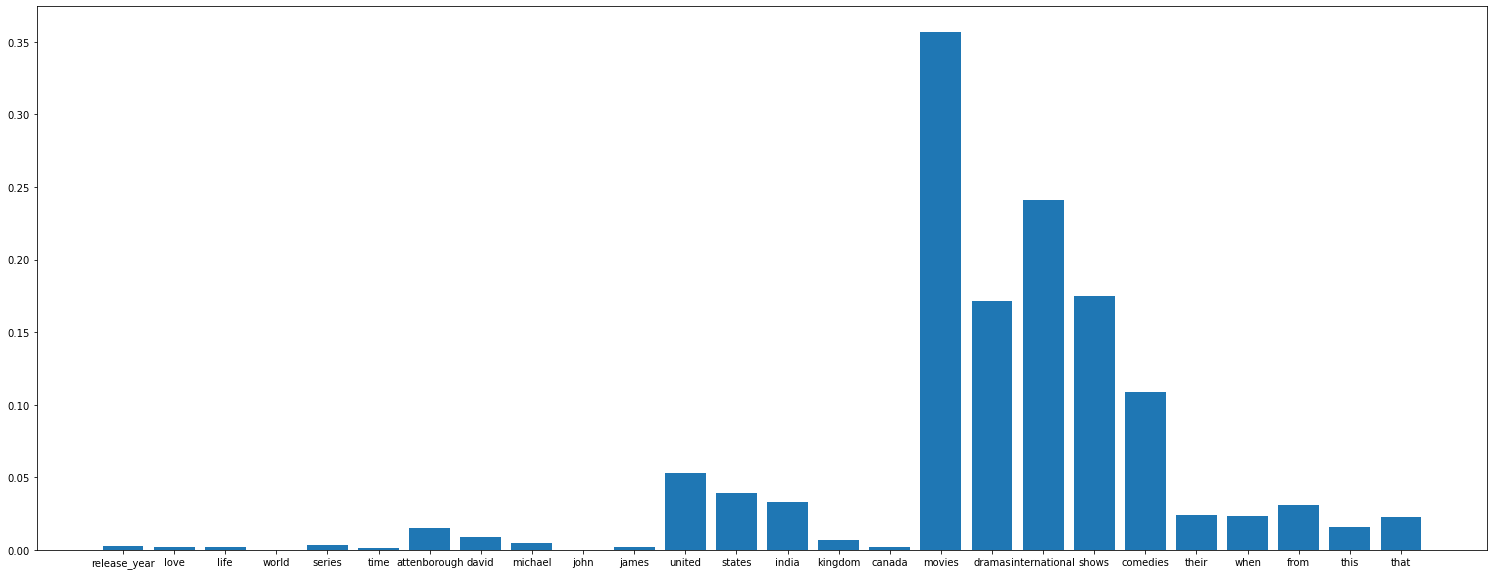

In [2272]:
plt.figure(figsize=(26,10))
fig.suptitle("Information Gain")
plt.bar(infgain["features"], infgain["gains"]);

## Phase 2:
### part 1
**Decision Tree** is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

**Attribute selection** measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute (Source). In the case of a continuous-valued attribute, split points for branches also need to define. Most popular selection measures are Information Gain, Gain Ratio, and Gini Index.

In [2112]:
def accurancy_assessment(testsize,maxdepth,minsamples,best_feature, types):
    X_train, X_test, y_train, y_test = train_test_split(best_feature, types, test_size=testsize) 
    clf = DecisionTreeClassifier(criterion="entropy",max_depth=maxdepth,min_samples_split = minsamples,random_state=1)
    clf = clf.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))   
    y_pred = clf.predict(np.array(X_test).reshape(-1,1))
    print("Accurancy : ", metrics.accuracy_score(np.array(y_test).reshape(-1,1), y_pred)*100,"%")
    print(metrics.confusion_matrix(np.array(y_test).reshape(-1,1), y_pred))

In [2325]:
X = preprossed['movies']
accurancy_assessment(testsize = 0.01,maxdepth = 10,minsamples = 10,best_feature= X,types=Y)

Accurancy :  83.78378378378379 %
[[44 18]
 [ 0 49]]


In [1661]:
accurancy_assessment(testsize = 0.01,maxdepth = 5,minsamples = 10,best_feature= X,types=Y)

Accurancy :  87.38738738738738 %
[[47 14]
 [ 0 50]]


In [1958]:
accurancy_assessment(testsize = 0.01,maxdepth = 6,minsamples = 5,best_feature= X,types=Y)

Accurancy :  90.990990990991 %
[[41 10]
 [ 0 60]]


In [2395]:
accurancy_assessment(testsize = 0.01,maxdepth = 30,minsamples = 30,best_feature= X,types=Y)

Accurancy :  84.68468468468468 %
[[38 17]
 [ 0 56]]


as we can see as the max depth raises, our accurancy would raise and same for the min sample split hyper parameter. also maximizing them so much would dicrease the spead and accurancy of the model. so for finding the best hyper parameters we are using a function called gridsearchCv method. this method would calculate accurancy over all range of hyper parameters passed to the function and it would return the best number for our hyper parameters, using this function we have defined the best value for max depth and min sample split hyper parameters. wich are 6 and 10 as it can be shown below.

In [2181]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(estimator=DecisionTreeClassifier(criterion="entropy",max_depth="max_depth"
            ,min_samples_split="min_samples_split",random_state=1),param_grid={
            'max_depth': [2,3,4,5,6,7,8,9,10],
            'min_samples_split': [2,3,4,5,6,7,8,9,10]}, error_score=0.01
             )


grid_result = gsc.fit(np.array(X).reshape(-1,1),np.array(Y).reshape(-1,1))
best_params = grid_result.best_params_
best_params

{'max_depth': 6, 'min_samples_split': 10}

In [2256]:
accurancy_assessment(testsize = 0.01,maxdepth = 6,minsamples = 10,best_feature= X,types=Y)

Accurancy :  91.8918918918919 %
[[53  9]
 [ 0 49]]


In [2343]:
accurancy_assessment(testsize = 0.02,maxdepth = 5,minsamples = 5,best_feature= X,types=Y)

Accurancy :  81.98198198198197 %
[[ 78  40]
 [  0 104]]


In [2324]:
accurancy_assessment(testsize = 0.4,maxdepth = 5,minsamples = 5,best_feature= X,types=Y)

Accurancy :  60.12658227848101 %
[[1880  582]
 [1182  780]]


raising the percentage of the test data, would weeken our prediction model, because the more our model consider different data, more efficient and with higher accurancy it would be. so as we can see if we pass 0.4 our data for test analyze, our model's accuracy would decrease and it wouldnt be accepted. also if our test size bacame so small(less than 0.01) the number of data that are passed to the classification predictor, and so assume that only one data has passed as the test data to our model. and assume that our predictor has predicted that data true or false, in thos case our accurancy would be assumed as 0% or either 100%. which is not that reliable. because our real accurancy might be 80% but because of predicting only one data right or wrong, we has predicted our accurancy wrong so far. so we should assume a logical number for our percentages of our size of test data. also bigger tree, doesnt necessaryly improve our model. so by testing all possible hyper parameters we can achive to a higher accurancy.

5
7


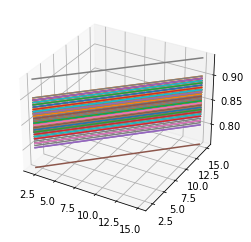

In [2371]:
def accurancy(testsize,maxdepth,minsamples,best_feature, types):
    X_train, X_test, y_train, y_test = train_test_split(best_feature, types, test_size=testsize) 
    clf = DecisionTreeClassifier(criterion="entropy",max_depth=maxdepth,min_samples_split = minsamples,random_state=1)
    clf = clf.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))   
    y_pred = clf.predict(np.array(X_test).reshape(-1,1))
    return metrics.accuracy_score(np.array(y_test).reshape(-1,1), y_pred)

ax = plt.axes(projection='3d')
depth = np.linspace(2, 15, 14,dtype = int)

minss = np.linspace(2, 15, 14,dtype = int)

accuracy = [[0 for x in range(14)] for y in range(14)]
for i in range(14):
    for j in range(14):
        accuracy[i][j]  = accurancy(testsize = 0.02,maxdepth = depth[i],minsamples = minss[j],best_feature= X,types=Y)

for d in depth:
    for m in minss:       
        ax.plot3D(depth, minss, accuracy[d-2][m-2])


max_value = max(accuracy)
best_depth = accuracy.index(max_value)

print(best_depth)
max_value = max(accuracy[best_depth])
best_min = accuracy[best_depth].index(max_value)
print(best_min)

## Phase 3:
### part 1 :
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree. random forest is a machine learning technique that’s used to solve regression and classification problms. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.A random forest algorithm consists of many decision trees. The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.
The (random forest) algorithm establishes the outcome based on the predictions of the decision trees. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.

7
11


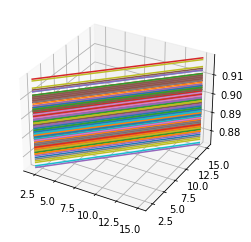

In [2397]:
from sklearn.ensemble import RandomForestClassifier

def accurancy_rf(maxdepth,minsamples,preprossed, types):
    X_train, X_test, y_train, y_test = train_test_split(preprossed, types, test_size=0.1) 
    clf=RandomForestClassifier()
    clf.fit(np.array(X_train),y_train.values.ravel())
    y_pred=clf.predict(X_test)
    return metrics.accuracy_score(np.array(y_test).reshape(-1,1), y_pred)

ax = plt.axes(projection='3d')
depth = np.linspace(2, 15, 14,dtype = int)

minss = np.linspace(2, 15, 14,dtype = int)

accuracy = [[0 for x in range(14)] for y in range(14)]
for i in range(14):
    for j in range(14):
        accuracy[i][j]  = accurancy_rf(maxdepth = depth[i],minsamples = minss[j],preprossed= Features,types=Y)

for d in depth:
    for m in minss:       
        ax.plot3D(depth, minss, accuracy[d-2][m-2])


max_value = max(accuracy)
best_depth = accuracy.index(max_value)

print(best_depth)
max_value = max(accuracy[best_depth])
best_min = accuracy[best_depth].index(max_value)
print(best_min)

## References :
https://stats.stackexchange.com/questions/10289/whats-the-difference-between-normalization-and-standardization

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173

https://homes.cs.washington.edu/~shapiro/EE596/notes/InfoGain.pdf

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

https://thepoints.medium.com/feature-extraction-from-text-using-countvectorizer-tfidfvectorizer-9f74f38f86cc

https://medium.datadriveninvestor.com/an-introduction-to-grid-search-ff57adcc0998

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html